In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
#Test Polynomial regression 
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


In [2]:
#import errors
df = pd.read_csv("error_wiki_train.csv")
#drop colunmn
df = df.drop(["Unnamed: 0"], axis=1)
print(df.shape)

(15804, 2)


In [3]:
#Add dummy ethnicities
ethnicity_list = ["white", "black", "asian", "indian", "others"]

df["ethnicity"] = np.random.choice(ethnicity_list, size=len(df))
print(df["ethnicity"].value_counts())
df.head()

others    3214
black     3166
indian    3157
white     3155
asian     3112
Name: ethnicity, dtype: int64


,Actual,Prediction,ethnicity
0,48,35,white
1,52,52,asian
2,39,39,black
3,44,52,white
4,31,41,white


### Test for Asians

In [4]:
mask = df["ethnicity"] == "asian"
df_asian = df[mask]

X = df_asian["Prediction"]
X = X.to_frame()

Y = df_asian["Actual"]
Y = Y.to_frame()

In [5]:
X

,Prediction
1,52
9,53
12,52
15,29
20,35
...,...
15781,26
15788,61
15791,33
15794,26


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 11)

# Poly

In [7]:
#Poly with 3 degrees
poly = PolynomialFeatures(degree=3)

X_train_P = poly.fit_transform(X_train)
X_test_P = poly.fit_transform(X_test)

reg = linear_model.LinearRegression()
reg.fit(X_train_P, Y_train)

y_pred_x_train_P = reg.predict(X_train_P)
y_pred_x_test_P = reg.predict(X_test_P)

print("Coef: " + str(reg.coef_))
print("Intercept: " + str(reg.intercept_))

Coef: [[ 0.00000000e+00  1.32255556e+00 -9.06519934e-03  8.98191758e-05]]
Intercept: [-4.61154905]


In [8]:
train_score = reg.score(X_train_P, Y_train)
test_score = reg.score(X_test_P, Y_test)
mae = mean_absolute_error(Y_test, y_pred_x_test_P)
rmse = math.sqrt(mean_squared_error(Y_test, y_pred_x_test_P))

print("Train score : "+ str(round(train_score,5)))
print("Test score : "+ str(round(test_score,5)))
print("MAE : " + str(round(mae,5)))
print("RMSE : " + str(round(rmse,5)))

Train score : 0.79679
Test score : 0.81776
MAE : 5.1826
RMSE : 6.84448


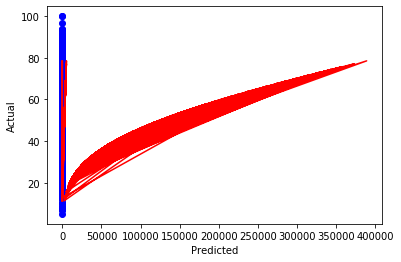

In [9]:
plt.scatter(X, Y, color = 'blue') 
  
plt.plot(X_test_P, y_pred_x_test_P, color = 'red') 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
  
plt.show() 

# Linear

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, Y_train)
y_pred_x_train = linear.predict(X_train)
Y_pred = linear.predict(X_test)

print("Coef: " + str(linear.coef_))
print("Intercept: " + str(linear.intercept_))

Coef: [[1.08155245]]
Intercept: [-3.24086878]


In [11]:
train_score = linear.score(X_train, Y_train)
test_score = linear.score(X_test, Y_test)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = math.sqrt(mean_squared_error(Y_test, Y_pred))

print("Train score : "+ str(round(train_score,5)))
print("Test score : "+ str(round(test_score,5)))
print("MAE : " + str(round(mae,5)))
print("RMSE : " + str(round(rmse,5)))

Train score : 0.79544
Test score : 0.81704
MAE : 5.18444
RMSE : 6.85797


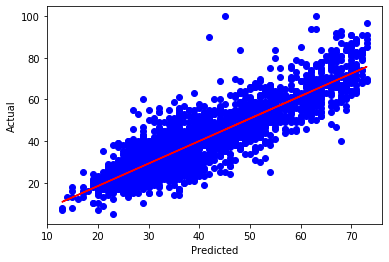

In [12]:
plt.scatter(X, Y, color = 'blue') 
  
plt.plot(X_test, Y_pred, color = 'red') 

plt.xlabel('Predicted') 
plt.ylabel('Actual') 

plt.show() 

# RandomForest

In [13]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=50)
RandomForestRegressorModel.fit(X_train, Y_train)
Y_pred = RandomForestRegressorModel.predict(X_test)

train_score = RandomForestRegressorModel.score(X_train, Y_train)
test_score = RandomForestRegressorModel.score(X_test, Y_test)
#prediction_score = RandomForestRegressorModel.score(X_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = math.sqrt(mean_squared_error(Y_test, Y_pred))

print("Train score : "+ str(round(train_score,5)))
print("Test score : "+ str(round(test_score,5)))
#print("Prediction score : " + str(round(prediction_score,5)))
print("MAE : " + str(round(mae,5)))
print("RMSE : " + str(round(rmse,5)))

Train score : 0.80362
Test score : 0.80784
MAE : 5.28958
RMSE : 7.02833


C:\Users\sebas\Anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


# RidgeCV

In [14]:
ridgecv = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
ridgecv.fit(X_train,Y_train)
Y_pred = ridgecv.predict(X_test)

print("Alpha: " + str(ridgecv.alpha_))
print("Coef: " + str(ridgecv.coef_))
print("Intercept: " + str(ridgecv.intercept_))

Alpha: 10.0
Coef: [[1.08152375]]
Intercept: [-3.23976883]


In [15]:
train_score = ridgecv.score(X_train, Y_train)
test_score = ridgecv.score(X_test, Y_test)
#prediction_score = ridgecv.score(X_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = math.sqrt(mean_squared_error(Y_test, Y_pred))

print("Train score : "+ str(round(train_score,5)))
print("Test score : "+ str(round(test_score,5)))
#print("Prediction score : " + str(round(prediction_score,5)))
print("MAE : " + str(round(mae,5)))
print("RMSE : " + str(round(rmse,5)))

Train score : 0.79544
Test score : 0.81704
MAE : 5.18444
RMSE : 6.85799


# LassoCV

In [16]:
lassocv = linear_model.LassoCV(alphas=np.logspace(-6, 6, 13))
lassocv.fit(X_train,Y_train)
Y_pred = lassocv.predict(X_test)

print("Alpha: " + str(lassocv.alpha_))
print("Coef: " + str(lassocv.coef_))
print("Intercept: " + str(lassocv.intercept_))

Alpha: 0.1
Coef: [1.0809744]
Intercept: -3.218717522665642


C:\Users\sebas\Anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sebas\Anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [17]:
train_score = lassocv.score(X_train, Y_train)
test_score = lassocv.score(X_test, Y_test)
# prediction_score = lassocv.score(X_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = math.sqrt(mean_squared_error(Y_test, Y_pred))

print("Train score : "+ str(round(train_score,5)))
print("Test score : "+ str(round(test_score,5)))
# print("Prediction score : " + str(round(prediction_score,5)))
print("MAE : " + str(round(mae,5)))
print("RMSE : " + str(round(rmse,5)))

Train score : 0.79544
Test score : 0.81702
MAE : 5.18457
RMSE : 6.85844


# DT

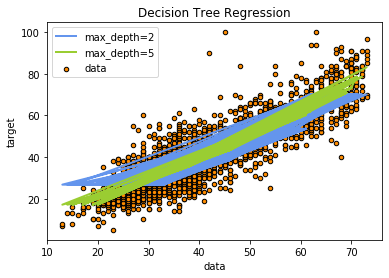

In [18]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, Y_train)
regr_2.fit(X_train, Y_train)
Y_pred1 = regr_1.predict(X_test)
Y_pred2 = regr_2.predict(X_test)

# Predict

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, Y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [19]:
train_score = regr_1.score(X_train, Y_train)
# test_score = regr_1.score(X_test, Y_1)
# prediction_score_1 = regr_1.score(X_test, y_1)
# prediction_score_2 = regr_2.score(X_test, y_2)

print("Train score : "+ str(round(train_score,5)))
print("Test score : "+ str(round(test_score,5)))
# print("Prediction score 1 : " + str(round(prediction_score_1,5)))
# print("Prediction score 2 : " + str(round(prediction_score_2,5)))
mae1 = mean_absolute_error(Y_test, Y_pred1)
rmse1 = math.sqrt(mean_squared_error(Y_test, Y_pred1))
mae2 = mean_absolute_error(Y_test, Y_pred2)
rmse2 = math.sqrt(mean_squared_error(Y_test, Y_pred2))

print("MAE1 : " + str(round(mae1,5)))
print("MAE2 : " + str(round(mae2,5)))

print("RMSE1 : " + str(round(rmse1,5)))
print("RMSE2 : " + str(round(rmse2,5)))

Train score : 0.74535
Test score : 0.81702
MAE1 : 6.14484
MAE2 : 5.2703
RMSE1 : 8.01702
RMSE2 : 6.98112
